--- Finding Optimal k with Elbow Method ---


c:\Users\Kabura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kabura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kabura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kabura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

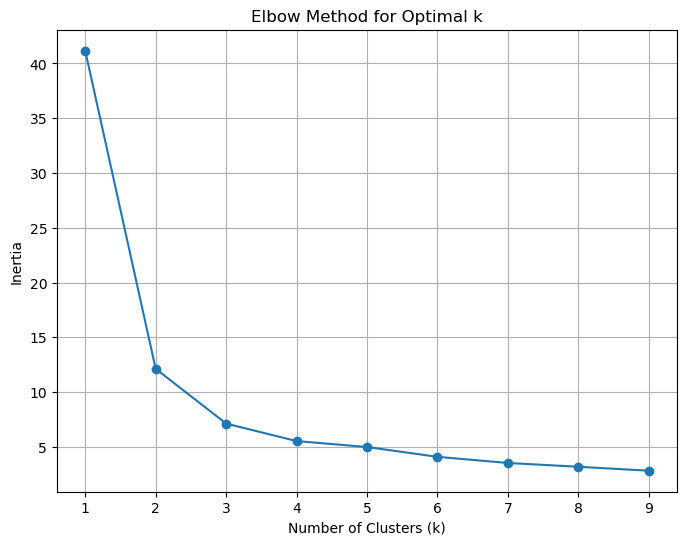

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

# Load and preprocess the data
def load_and_scale_iris_data():
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['class'] = iris.target
    
    scaler = MinMaxScaler()
    df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])
    return df

iris_df = load_and_scale_iris_data()
X = iris_df.drop('class', axis=1)

# Experiment with different k values and plot the elbow curve
print("--- Finding Optimal k with Elbow Method ---")
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

--- Applying K-Means with k=3 ---

--- Visualizing Clusters ---


c:\Users\Kabura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


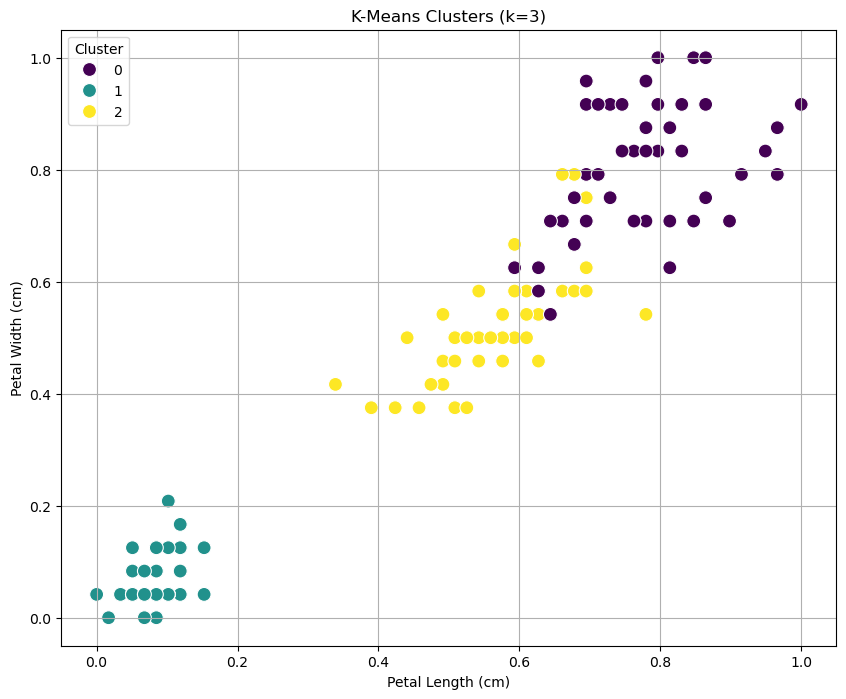

In [5]:
# Apply K-Means clustering with k=3
print("--- Applying K-Means with k=3 ---")
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
y_pred = kmeans.fit_predict(X)
iris_df['Cluster'] = y_pred

# Visualize the clusters
print("\n--- Visualizing Clusters ---")
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='Cluster', 
    data=iris_df, 
    palette='viridis', 
    s=100
)
plt.title('K-Means Clusters (k=3)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()